In [1]:
%matplotlib inline
import matplotlib
import seaborn as sns
matplotlib.rcParams['savefig.dpi'] = 144

In [2]:
import requests

base_url = 'https://www.fpds.gov/ezsearch/FEEDS/ATOM?FEEDNAME=PUBLIC&templateName=1.5.0&q='

# N0001902C3002

# base_url = r'https://www.fpds.gov/ezsearch/search.do?s=FPDS&indexName=awardfull&templateName=1.5.0&q='

payload = {
    'DEPARTMENT_ID': '9700',
    'REASON_FOR_MODIFICATION': 'X'
}

failures = requests.get(base_url+r'DEPARTMENT_ID:"9700"+REASON_FOR_MODIFICATION:"X"&start=0')
# failures = requests.get(base_url, params=payload)
# failures = requests.get('https://www.fpds.gov/ezsearch/search.do?s=FPDS&indexName=awardfull&templateName=1.5.0&q=DEPARTMENT_ID%3A%229700%22+REASON_FOR_MODIFICATION%3A%22X%22&start=0')

print failures.url

print(failures)

https://www.fpds.gov/ezsearch/FEEDS/ATOM?FEEDNAME=PUBLIC&templateName=1.5.0&q=DEPARTMENT_ID:%229700%22+REASON_FOR_MODIFICATION:%22X%22&start=0
<Response [200]>


In [60]:
print(failures.content)

<?xml version="1.0" encoding="UTF-8"?>
<feed xmlns="http://www.w3.org/2005/Atom">
  <title>FPDS-NG search results for<![CDATA[: DEPARTMENT_ID:"9700" REASON_FOR_MODIFICATION:"X"]]></title>
  <link rel="alternate" type="text/html" href="https://www.fpds.gov/ezsearch/search.do?s=FPDS&amp;indexName=awardfull&amp;templateName=1.5.0&amp;q=DEPARTMENT_ID%3A%229700%22+REASON_FOR_MODIFICATION%3A%22X%22&amp;start=0"></link>
  <link rel="last" type="text/html" href="https://www.fpds.gov/ezsearch/FEEDS/ATOM?s=FPDS&amp;FEEDNAME=PUBLIC&amp;VERSION=1.5.0&amp;q=DEPARTMENT_ID%3A%229700%22+REASON_FOR_MODIFICATION%3A%22X%22&amp;start=1840"></link>
  <link rel="next" type="text/html" href="https://www.fpds.gov/ezsearch/FEEDS/ATOM?s=FPDS&amp;FEEDNAME=PUBLIC&amp;VERSION=1.5.0&amp;q=DEPARTMENT_ID%3A%229700%22+REASON_FOR_MODIFICATION%3A%22X%22&amp;start=10"></link>
  <modified/>
  <author>
    <name/>
  </author>
  <entry>
    <title><![CDATA[DELIVERY ORDER 0001 (1) awarded to LIANA CONSTRUCTION LLC, was modif

In [59]:
import xml.etree.ElementTree as ET

et_data = ET.XML(failures.content)

for child in et_data:
    print child.tag, child.attrib
    
print(et_data.attrib)

{http://www.w3.org/2005/Atom}title {}
{http://www.w3.org/2005/Atom}link {'href': 'https://www.fpds.gov/ezsearch/search.do?s=FPDS&indexName=awardfull&templateName=1.5.0&q=DEPARTMENT_ID%3A%229700%22+REASON_FOR_MODIFICATION%3A%22X%22&start=0', 'type': 'text/html', 'rel': 'alternate'}
{http://www.w3.org/2005/Atom}link {'href': 'https://www.fpds.gov/ezsearch/FEEDS/ATOM?s=FPDS&FEEDNAME=PUBLIC&VERSION=1.5.0&q=DEPARTMENT_ID%3A%229700%22+REASON_FOR_MODIFICATION%3A%22X%22&start=1840', 'type': 'text/html', 'rel': 'last'}
{http://www.w3.org/2005/Atom}link {'href': 'https://www.fpds.gov/ezsearch/FEEDS/ATOM?s=FPDS&FEEDNAME=PUBLIC&VERSION=1.5.0&q=DEPARTMENT_ID%3A%229700%22+REASON_FOR_MODIFICATION%3A%22X%22&start=10', 'type': 'text/html', 'rel': 'next'}
{http://www.w3.org/2005/Atom}modified {}
{http://www.w3.org/2005/Atom}author {}
{http://www.w3.org/2005/Atom}entry {}
{http://www.w3.org/2005/Atom}entry {}
{http://www.w3.org/2005/Atom}entry {}
{http://www.w3.org/2005/Atom}entry {}
{http://www.w3.org/2

In [ ]:
from lxml import etree, objectify

root = etree.fromstring(failures.content)

### Purge the namespace, which tells us very little
for elem in root.getiterator():
    if not hasattr(elem.tag, 'find'): continue  # (1)
    i = elem.tag.find('}')
    if i >= 0:
        elem.tag = elem.tag[i+1:]
objectify.deannotate(root, cleanup_namespaces=True)

objectify.deannotate(root, cleanup_namespaces=True)
print(root.tag)

for child in root:
    print child.tag

In [ ]:
for elt in root.findall("entry//signedDate"):
    print elt.text

In [ ]:
next_url = ''

In [ ]:
for link in root.findall(".//link"):
    if link.attrib['rel'] == 'next':
        next_url = link.attrib['href']
print next_url

In [ ]:
def getlink(relation):
    return root.xpath("//link[@rel='" + relation + "']")[0].attrib['href']

In [ ]:
this_url = getlink('alternate')
next_url = getlink('next')
last_url = getlink('last')
# print next_url[0].attrib['href']
print this_url
print next_url
print last_url

In [ ]:
cancellations = []

for entry in root.findall(".//entry"): #//content//award//contractData
    x = {}
    
#     print entry.attrib
    x['ContractID'] = entry.find(".//PIID").text
    x['Termination Type'] = entry.find(".//contractData//reasonForModification").text
    
    cancellations.append(x)

#     for child in entry:
#         print child.tag, child.text, child.attrib

print(cancellations)

# Full stack at once

In [1]:
def purge_namespace(root):
    """
    Removes namespaces from the XML tree, because they otherwise complicate lookups without adding useful information.
    """
    from lxml import etree, objectify
    
    for elem in root.getiterator():
        if not hasattr(elem.tag, 'find'): continue 
        i = elem.tag.find('}')
        if i >= 0:
            elem.tag = elem.tag[i+1:]
    objectify.deannotate(root, cleanup_namespaces=True)
    return root

In [3]:
import requests
import re
from lxml import etree, objectify

base_url = 'https://www.fpds.gov/ezsearch/FEEDS/ATOM?FEEDNAME=PUBLIC&templateName=1.5.0&q='
args = r'DEPARTMENT_ID:"9700"+REASON_FOR_MODIFICATION:"X"'
cancellation_types = {'X': 'Terminate for Cause',
                      'E': 'Terminate for Default (complete or partial)',
                      'F': 'Terminate for Convenience (complete or partial)',
                      'K': 'Close Out',
                      'N': 'Legal Contract Cancellation'}
url_inc = '&start='

def getlink(root, relation):
    return root.xpath(".//link[@rel='" + relation + "']")[0].attrib['href']

last_count = 0

r = requests.get(base_url+args)
root = purge_namespace(etree.fromstring(r.content))

last_url = getlink(root, 'last')

regex = re.compile(r'[\d]+$')
last_page_count = int(re.findall(regex, last_url)[0])

start_values = range(0, last_page_count+1, 10)
urls = [(base_url + args + url_inc + str(x)) for x in start_values]
cancellations = []

for url in urls:
    r = requests.get(url)
    
    root = purge_namespace(etree.fromstring(r.content))
    
    for entry in root.findall(".//entry"):
        x = {}

        x['ContractID'] = entry.find(".//PIID").text
        x['Termination Type'] = entry.find(".//contractData//reasonForModification").text

        cancellations.append(x)

print(len(cancellations))

1841


In [4]:
import requests
import re
from lxml import etree, objectify
import pandas as pd

base_url = 'https://www.fpds.gov/ezsearch/FEEDS/ATOM?FEEDNAME=PUBLIC&templateName=1.5.0&q='
args = r'DEPARTMENT_ID:"9700"+REASON_FOR_MODIFICATION:"'
cancellation_types = {'X': 'Terminate for Cause',
                      'E': 'Terminate for Default (complete or partial)',
                      'F': 'Terminate for Convenience (complete orpartial)',
                      'K': 'Close Out',
                      'N': 'Legal Contract Cancellation'}
url_inc = '"&start='

output = []

for code in cancellation_types.keys():
    
    url = base_url+args+code+'"'
    
    r = requests.get(url)
    root = purge_namespace(etree.fromstring(r.content))

    last_url = getlink(root, 'last')

    regex = re.compile(r'[\d]+$')
    last_page_count = int(re.findall(regex, last_url)[0])
    
    output.append({'code': code, 'description': cancellation_types[code], 'rough_count': last_page_count})

print pd.DataFrame(output, index=None)

  code                                     description  rough_count
0    X                             Terminate for Cause         1840
1    K                                       Close Out       257140
2    N                     Legal Contract Cancellation        67270
3    E     Terminate for Default (complete or partial)        10280
4    F  Terminate for Convenience (complete orpartial)        93260


In [5]:
df = pd.DataFrame(output)
df.set_index('code', inplace=True)

In [6]:
df

,description,rough_count
code,,
X,Terminate for Cause,1840
K,Close Out,257140
N,Legal Contract Cancellation,67270
E,Terminate for Default (complete or partial),10280
F,Terminate for Convenience (complete orpartial),93260


# Making one dataframe from these results

In [ ]:
import requests
import re
from lxml import etree, objectify
import pandas as pd

def getlink(root, relation):
    return root.xpath(".//link[@rel='" + relation + "']")[0].attrib['href']


def purge_namespace(root):
    """
    Removes namespaces from the XML tree, because they otherwise complicate lookups without adding useful information.
    """
    from lxml import etree, objectify
    
    for elem in root.getiterator():
        if not hasattr(elem.tag, 'find'): continue 
        i = elem.tag.find('}')
        if i >= 0:
            elem.tag = elem.tag[i+1:]
    objectify.deannotate(root, cleanup_namespaces=True)
    return root


base_url = 'https://www.fpds.gov/ezsearch/FEEDS/ATOM?FEEDNAME=PUBLIC&templateName=1.5.0&q='
args = r'DEPARTMENT_ID:"9700"+REASON_FOR_MODIFICATION:"'
cancellation_types = {'X': 'Terminate for Cause',
                      'E': 'Terminate for Default (complete or partial)',
                      'F': 'Terminate for Convenience (complete orpartial)',
                      'K': 'Close Out',
                      'N': 'Legal Contract Cancellation'}
url_inc = '"&start='

output = []



for code in cancellation_types.keys():
    
    print('Code: %s' % code)

    r = requests.get(base_url+args+code+'"')
    root = purge_namespace(etree.fromstring(r.content))

    last_url = getlink(root, 'last')

    regex = re.compile(r'[\d]+$')
    last_page_count = int(re.findall(regex, last_url)[0])

    start_values = range(0, last_page_count+1, 10)
#   for scaling, only take the first 100 results for each category
#    naive sequential run takes about an hour to load 426,000 rows
#     start_values = range(0, 101, 10)
 

    urls = [(base_url + args + code+ url_inc + str(x)) for x in start_values]

    for url in urls:
        print('URL end: %s' % url[-5:])
        r = requests.get(url)

        root = purge_namespace(etree.fromstring(r.content))
        
#         entrycount = 0

        for entry in root.findall(".//entry"):
            
#             entrycount += 1
#             print('Entry: %s' % entrycount)
            
            x = {}

            x['ContractID'] = entry.find(".//PIID").text
            
            try:
                x['AltContractID'] = entry.find(".//referencedIDVID//PIID").text
            except:
                x['AltContractID'] = None
                
            x['Termination Type'] = code
            
            x['Signed Date'] = entry.find(".//signedDate").text
            
            x['Effective Date'] = entry.find(".//effectiveDate").text
            
            
            
            try: #entry.find(".//purchaserInformation//contractingOfficeAgencyID") is not None:
                x['Contracting Office'] = entry.find(".//purchaserInformation//contractingOfficeAgencyID").attrib['name']
            except:
                #x['Contracting Office'] = None
                pass
            
            if entry.find(".//typeOfContractPricing") is not None:
                x['Contract Pricing'] = entry.find(".//typeOfContractPricing").attrib['description']
            else:
                x['Contract Pricing'] = None
                
            try:
                x['Vendor'] = entry.find(".//vendorName").text
            except:
                pass
            
            try:
                x['Performance State'] = entry.find(".//principalPlaceOfPerformance//stateCode").text
            except:
                pass
            
            try:
                x['Performance ZIP'] = entry.find(".//principalPlaceOfPerformance//placeOfPerformanceZIPCode").text
            except:
                pass
                
            try:    
                x['Performance Congressional District'] = entry.find(".//placeOfPerformanceCongressionalDistrict").text
            except:
                pass
            
            try:
                x['Extent Competed'] = entry.find(".//extentCompeted").attrib['description']
            except:
                pass
            
            try:
                x['Rival Bid Count'] = int(entry.find(".//numberOfOffersReceived").text) - 1
            except:
                pass
            
            try:
                x['Total Obligated Dollars'] = float(entry.find(".//totalObligatedAmount").text)
            except:
                pass
            
            try:
                x['Obligated Dollars at Closing'] = float(entry.find(".//obligatedAmount").text)
            except:
                pass
            
            try:
                x['End Date'] = entry.find(".//ultimateCompletionDate").text
            except:
                pass

            
            # Other things to be captured for each contract will be put here

            
#           <ns1:referencedIDVID>
#             <ns1:agencyID name="DEPT OF DEFENSE">9700</ns1:agencyID>
#             <ns1:PIID>W912CN16D0009</ns1:PIID>

            output.append(x)

print(len(output))

Code: X
URL end: art=0
URL end: rt=10
URL end: rt=20
URL end: rt=30
URL end: rt=40
URL end: rt=50
URL end: rt=60
URL end: rt=70
URL end: rt=80
URL end: rt=90
URL end: t=100
URL end: t=110
URL end: t=120
URL end: t=130
URL end: t=140
URL end: t=150
URL end: t=160
URL end: t=170
URL end: t=180
URL end: t=190
URL end: t=200
URL end: t=210
URL end: t=220
URL end: t=230
URL end: t=240
URL end: t=250
URL end: t=260
URL end: t=270
URL end: t=280
URL end: t=290
URL end: t=300
URL end: t=310
URL end: t=320
URL end: t=330
URL end: t=340
URL end: t=350
URL end: t=360
URL end: t=370
URL end: t=380
URL end: t=390
URL end: t=400
URL end: t=410
URL end: t=420
URL end: t=430
URL end: t=440
URL end: t=450
URL end: t=460
URL end: t=470
URL end: t=480
URL end: t=490
URL end: t=500
URL end: t=510
URL end: t=520
URL end: t=530
URL end: t=540
URL end: t=550
URL end: t=560
URL end: t=570
URL end: t=580
URL end: t=590
URL end: t=600
URL end: t=610
URL end: t=620
URL end: t=630
URL end: t=640
URL end: t=650
UR

URL end: =3610
URL end: =3620
URL end: =3630
URL end: =3640
URL end: =3650
URL end: =3660
URL end: =3670
URL end: =3680
URL end: =3690
URL end: =3700
URL end: =3710
URL end: =3720
URL end: =3730
URL end: =3740
URL end: =3750
URL end: =3760
URL end: =3770
URL end: =3780
URL end: =3790
URL end: =3800
URL end: =3810
URL end: =3820
URL end: =3830
URL end: =3840
URL end: =3850
URL end: =3860
URL end: =3870
URL end: =3880
URL end: =3890
URL end: =3900
URL end: =3910
URL end: =3920
URL end: =3930
URL end: =3940
URL end: =3950
URL end: =3960
URL end: =3970
URL end: =3980
URL end: =3990
URL end: =4000
URL end: =4010
URL end: =4020
URL end: =4030
URL end: =4040
URL end: =4050
URL end: =4060
URL end: =4070
URL end: =4080
URL end: =4090
URL end: =4100
URL end: =4110
URL end: =4120
URL end: =4130
URL end: =4140
URL end: =4150
URL end: =4160
URL end: =4170
URL end: =4180
URL end: =4190
URL end: =4200
URL end: =4210
URL end: =4220
URL end: =4230
URL end: =4240
URL end: =4250
URL end: =4260
URL end: =

URL end: =9080
URL end: =9090
URL end: =9100
URL end: =9110
URL end: =9120
URL end: =9130
URL end: =9140
URL end: =9150
URL end: =9160
URL end: =9170
URL end: =9180
URL end: =9190
URL end: =9200
URL end: =9210
URL end: =9220
URL end: =9230
URL end: =9240
URL end: =9250
URL end: =9260
URL end: =9270
URL end: =9280
URL end: =9290
URL end: =9300
URL end: =9310
URL end: =9320
URL end: =9330
URL end: =9340
URL end: =9350
URL end: =9360
URL end: =9370
URL end: =9380
URL end: =9390
URL end: =9400
URL end: =9410
URL end: =9420
URL end: =9430
URL end: =9440
URL end: =9450
URL end: =9460
URL end: =9470
URL end: =9480
URL end: =9490
URL end: =9500
URL end: =9510
URL end: =9520
URL end: =9530
URL end: =9540
URL end: =9550
URL end: =9560
URL end: =9570
URL end: =9580
URL end: =9590
URL end: =9600
URL end: =9610
URL end: =9620
URL end: =9630
URL end: =9640
URL end: =9650
URL end: =9660
URL end: =9670
URL end: =9680
URL end: =9690
URL end: =9700
URL end: =9710
URL end: =9720
URL end: =9730
URL end: =

URL end: 14550
URL end: 14560
URL end: 14570
URL end: 14580
URL end: 14590
URL end: 14600
URL end: 14610
URL end: 14620
URL end: 14630
URL end: 14640
URL end: 14650
URL end: 14660
URL end: 14670
URL end: 14680
URL end: 14690
URL end: 14700
URL end: 14710
URL end: 14720
URL end: 14730
URL end: 14740
URL end: 14750
URL end: 14760
URL end: 14770
URL end: 14780
URL end: 14790
URL end: 14800
URL end: 14810
URL end: 14820
URL end: 14830
URL end: 14840
URL end: 14850
URL end: 14860
URL end: 14870
URL end: 14880
URL end: 14890
URL end: 14900
URL end: 14910
URL end: 14920
URL end: 14930
URL end: 14940
URL end: 14950
URL end: 14960
URL end: 14970
URL end: 14980
URL end: 14990
URL end: 15000
URL end: 15010
URL end: 15020
URL end: 15030
URL end: 15040
URL end: 15050
URL end: 15060
URL end: 15070
URL end: 15080
URL end: 15090
URL end: 15100
URL end: 15110
URL end: 15120
URL end: 15130
URL end: 15140
URL end: 15150
URL end: 15160
URL end: 15170
URL end: 15180
URL end: 15190
URL end: 15200
URL end: 1

URL end: 20030
URL end: 20040
URL end: 20050
URL end: 20060
URL end: 20070
URL end: 20080
URL end: 20090
URL end: 20100
URL end: 20110
URL end: 20120
URL end: 20130
URL end: 20140
URL end: 20150
URL end: 20160
URL end: 20170
URL end: 20180
URL end: 20190
URL end: 20200
URL end: 20210
URL end: 20220
URL end: 20230
URL end: 20240
URL end: 20250
URL end: 20260
URL end: 20270
URL end: 20280
URL end: 20290
URL end: 20300
URL end: 20310
URL end: 20320
URL end: 20330
URL end: 20340
URL end: 20350
URL end: 20360
URL end: 20370
URL end: 20380
URL end: 20390
URL end: 20400
URL end: 20410
URL end: 20420
URL end: 20430
URL end: 20440
URL end: 20450
URL end: 20460
URL end: 20470
URL end: 20480
URL end: 20490
URL end: 20500
URL end: 20510
URL end: 20520
URL end: 20530
URL end: 20540
URL end: 20550
URL end: 20560
URL end: 20570
URL end: 20580
URL end: 20590
URL end: 20600
URL end: 20610
URL end: 20620
URL end: 20630
URL end: 20640
URL end: 20650
URL end: 20660
URL end: 20670
URL end: 20680
URL end: 2

URL end: 25500
URL end: 25510
URL end: 25520
URL end: 25530
URL end: 25540
URL end: 25550
URL end: 25560
URL end: 25570
URL end: 25580
URL end: 25590
URL end: 25600
URL end: 25610
URL end: 25620
URL end: 25630
URL end: 25640
URL end: 25650
URL end: 25660
URL end: 25670
URL end: 25680
URL end: 25690
URL end: 25700
URL end: 25710
URL end: 25720
URL end: 25730
URL end: 25740
URL end: 25750
URL end: 25760
URL end: 25770
URL end: 25780
URL end: 25790
URL end: 25800
URL end: 25810
URL end: 25820
URL end: 25830
URL end: 25840
URL end: 25850
URL end: 25860
URL end: 25870
URL end: 25880
URL end: 25890
URL end: 25900
URL end: 25910
URL end: 25920
URL end: 25930
URL end: 25940
URL end: 25950
URL end: 25960
URL end: 25970
URL end: 25980
URL end: 25990
URL end: 26000
URL end: 26010
URL end: 26020
URL end: 26030
URL end: 26040
URL end: 26050
URL end: 26060
URL end: 26070
URL end: 26080
URL end: 26090
URL end: 26100
URL end: 26110
URL end: 26120
URL end: 26130
URL end: 26140
URL end: 26150
URL end: 2

URL end: 30970
URL end: 30980
URL end: 30990
URL end: 31000
URL end: 31010
URL end: 31020
URL end: 31030
URL end: 31040
URL end: 31050
URL end: 31060
URL end: 31070
URL end: 31080
URL end: 31090
URL end: 31100
URL end: 31110
URL end: 31120
URL end: 31130
URL end: 31140
URL end: 31150
URL end: 31160
URL end: 31170
URL end: 31180
URL end: 31190
URL end: 31200
URL end: 31210
URL end: 31220
URL end: 31230
URL end: 31240
URL end: 31250
URL end: 31260
URL end: 31270
URL end: 31280
URL end: 31290
URL end: 31300
URL end: 31310
URL end: 31320
URL end: 31330
URL end: 31340
URL end: 31350
URL end: 31360
URL end: 31370
URL end: 31380
URL end: 31390
URL end: 31400
URL end: 31410
URL end: 31420
URL end: 31430
URL end: 31440
URL end: 31450
URL end: 31460
URL end: 31470
URL end: 31480
URL end: 31490
URL end: 31500
URL end: 31510
URL end: 31520
URL end: 31530
URL end: 31540
URL end: 31550
URL end: 31560
URL end: 31570
URL end: 31580
URL end: 31590
URL end: 31600
URL end: 31610
URL end: 31620
URL end: 3

URL end: 36450
URL end: 36460
URL end: 36470
URL end: 36480
URL end: 36490
URL end: 36500
URL end: 36510
URL end: 36520
URL end: 36530
URL end: 36540
URL end: 36550
URL end: 36560
URL end: 36570
URL end: 36580
URL end: 36590
URL end: 36600
URL end: 36610
URL end: 36620
URL end: 36630
URL end: 36640
URL end: 36650
URL end: 36660
URL end: 36670
URL end: 36680
URL end: 36690
URL end: 36700
URL end: 36710
URL end: 36720
URL end: 36730
URL end: 36740
URL end: 36750
URL end: 36760
URL end: 36770
URL end: 36780
URL end: 36790
URL end: 36800
URL end: 36810
URL end: 36820
URL end: 36830
URL end: 36840
URL end: 36850
URL end: 36860
URL end: 36870
URL end: 36880
URL end: 36890
URL end: 36900
URL end: 36910
URL end: 36920
URL end: 36930
URL end: 36940
URL end: 36950
URL end: 36960
URL end: 36970
URL end: 36980
URL end: 36990
URL end: 37000
URL end: 37010
URL end: 37020
URL end: 37030
URL end: 37040
URL end: 37050
URL end: 37060
URL end: 37070
URL end: 37080
URL end: 37090
URL end: 37100
URL end: 3

URL end: 41920
URL end: 41930
URL end: 41940
URL end: 41950
URL end: 41960
URL end: 41970
URL end: 41980
URL end: 41990
URL end: 42000
URL end: 42010
URL end: 42020
URL end: 42030
URL end: 42040
URL end: 42050
URL end: 42060
URL end: 42070
URL end: 42080
URL end: 42090
URL end: 42100
URL end: 42110
URL end: 42120
URL end: 42130
URL end: 42140
URL end: 42150
URL end: 42160
URL end: 42170
URL end: 42180
URL end: 42190
URL end: 42200
URL end: 42210
URL end: 42220
URL end: 42230
URL end: 42240
URL end: 42250
URL end: 42260
URL end: 42270
URL end: 42280
URL end: 42290
URL end: 42300
URL end: 42310
URL end: 42320
URL end: 42330
URL end: 42340
URL end: 42350
URL end: 42360
URL end: 42370
URL end: 42380
URL end: 42390
URL end: 42400
URL end: 42410
URL end: 42420
URL end: 42430
URL end: 42440
URL end: 42450
URL end: 42460
URL end: 42470
URL end: 42480
URL end: 42490
URL end: 42500
URL end: 42510
URL end: 42520
URL end: 42530
URL end: 42540
URL end: 42550
URL end: 42560
URL end: 42570
URL end: 4

URL end: 47390
URL end: 47400
URL end: 47410
URL end: 47420
URL end: 47430
URL end: 47440
URL end: 47450
URL end: 47460
URL end: 47470
URL end: 47480
URL end: 47490
URL end: 47500
URL end: 47510
URL end: 47520
URL end: 47530
URL end: 47540
URL end: 47550
URL end: 47560
URL end: 47570
URL end: 47580
URL end: 47590
URL end: 47600
URL end: 47610
URL end: 47620
URL end: 47630
URL end: 47640
URL end: 47650
URL end: 47660
URL end: 47670
URL end: 47680
URL end: 47690
URL end: 47700
URL end: 47710
URL end: 47720
URL end: 47730
URL end: 47740
URL end: 47750
URL end: 47760
URL end: 47770
URL end: 47780
URL end: 47790
URL end: 47800
URL end: 47810
URL end: 47820
URL end: 47830
URL end: 47840
URL end: 47850
URL end: 47860
URL end: 47870
URL end: 47880
URL end: 47890
URL end: 47900
URL end: 47910
URL end: 47920
URL end: 47930
URL end: 47940
URL end: 47950
URL end: 47960
URL end: 47970
URL end: 47980
URL end: 47990
URL end: 48000
URL end: 48010
URL end: 48020
URL end: 48030
URL end: 48040
URL end: 4

URL end: 52870
URL end: 52880
URL end: 52890
URL end: 52900
URL end: 52910
URL end: 52920
URL end: 52930
URL end: 52940
URL end: 52950
URL end: 52960
URL end: 52970
URL end: 52980
URL end: 52990
URL end: 53000
URL end: 53010
URL end: 53020
URL end: 53030
URL end: 53040
URL end: 53050
URL end: 53060
URL end: 53070
URL end: 53080
URL end: 53090
URL end: 53100
URL end: 53110
URL end: 53120
URL end: 53130
URL end: 53140
URL end: 53150
URL end: 53160
URL end: 53170
URL end: 53180
URL end: 53190
URL end: 53200
URL end: 53210
URL end: 53220
URL end: 53230
URL end: 53240
URL end: 53250
URL end: 53260
URL end: 53270
URL end: 53280
URL end: 53290
URL end: 53300
URL end: 53310
URL end: 53320
URL end: 53330
URL end: 53340
URL end: 53350
URL end: 53360
URL end: 53370
URL end: 53380
URL end: 53390
URL end: 53400
URL end: 53410
URL end: 53420
URL end: 53430
URL end: 53440
URL end: 53450
URL end: 53460
URL end: 53470
URL end: 53480
URL end: 53490
URL end: 53500
URL end: 53510
URL end: 53520
URL end: 5

URL end: 58340
URL end: 58350
URL end: 58360
URL end: 58370
URL end: 58380
URL end: 58390
URL end: 58400
URL end: 58410
URL end: 58420
URL end: 58430
URL end: 58440
URL end: 58450
URL end: 58460
URL end: 58470
URL end: 58480
URL end: 58490
URL end: 58500
URL end: 58510
URL end: 58520
URL end: 58530
URL end: 58540
URL end: 58550
URL end: 58560
URL end: 58570
URL end: 58580
URL end: 58590
URL end: 58600
URL end: 58610
URL end: 58620
URL end: 58630
URL end: 58640
URL end: 58650
URL end: 58660
URL end: 58670
URL end: 58680
URL end: 58690
URL end: 58700
URL end: 58710
URL end: 58720
URL end: 58730
URL end: 58740
URL end: 58750
URL end: 58760
URL end: 58770
URL end: 58780
URL end: 58790
URL end: 58800
URL end: 58810
URL end: 58820
URL end: 58830
URL end: 58840
URL end: 58850
URL end: 58860
URL end: 58870
URL end: 58880
URL end: 58890
URL end: 58900
URL end: 58910
URL end: 58920
URL end: 58930
URL end: 58940
URL end: 58950
URL end: 58960
URL end: 58970
URL end: 58980
URL end: 58990
URL end: 5

URL end: 63810
URL end: 63820
URL end: 63830
URL end: 63840
URL end: 63850
URL end: 63860
URL end: 63870
URL end: 63880
URL end: 63890
URL end: 63900
URL end: 63910
URL end: 63920
URL end: 63930
URL end: 63940
URL end: 63950
URL end: 63960
URL end: 63970
URL end: 63980
URL end: 63990
URL end: 64000
URL end: 64010
URL end: 64020
URL end: 64030
URL end: 64040
URL end: 64050
URL end: 64060
URL end: 64070
URL end: 64080
URL end: 64090
URL end: 64100
URL end: 64110
URL end: 64120
URL end: 64130
URL end: 64140
URL end: 64150
URL end: 64160
URL end: 64170
URL end: 64180
URL end: 64190
URL end: 64200
URL end: 64210
URL end: 64220
URL end: 64230
URL end: 64240
URL end: 64250
URL end: 64260
URL end: 64270
URL end: 64280
URL end: 64290
URL end: 64300
URL end: 64310
URL end: 64320
URL end: 64330
URL end: 64340
URL end: 64350
URL end: 64360
URL end: 64370
URL end: 64380
URL end: 64390
URL end: 64400
URL end: 64410
URL end: 64420
URL end: 64430
URL end: 64440
URL end: 64450
URL end: 64460
URL end: 6

URL end: 69280
URL end: 69290
URL end: 69300
URL end: 69310
URL end: 69320
URL end: 69330
URL end: 69340
URL end: 69350
URL end: 69360
URL end: 69370
URL end: 69380
URL end: 69390
URL end: 69400
URL end: 69410
URL end: 69420
URL end: 69430
URL end: 69440
URL end: 69450
URL end: 69460
URL end: 69470
URL end: 69480
URL end: 69490
URL end: 69500
URL end: 69510
URL end: 69520
URL end: 69530
URL end: 69540
URL end: 69550
URL end: 69560
URL end: 69570
URL end: 69580
URL end: 69590
URL end: 69600
URL end: 69610
URL end: 69620
URL end: 69630
URL end: 69640
URL end: 69650
URL end: 69660
URL end: 69670
URL end: 69680
URL end: 69690
URL end: 69700
URL end: 69710
URL end: 69720
URL end: 69730
URL end: 69740
URL end: 69750
URL end: 69760
URL end: 69770
URL end: 69780
URL end: 69790
URL end: 69800
URL end: 69810
URL end: 69820
URL end: 69830
URL end: 69840
URL end: 69850
URL end: 69860
URL end: 69870
URL end: 69880
URL end: 69890
URL end: 69900
URL end: 69910
URL end: 69920
URL end: 69930
URL end: 6

URL end: 74750
URL end: 74760
URL end: 74770
URL end: 74780
URL end: 74790
URL end: 74800
URL end: 74810
URL end: 74820
URL end: 74830
URL end: 74840
URL end: 74850
URL end: 74860
URL end: 74870
URL end: 74880
URL end: 74890
URL end: 74900
URL end: 74910
URL end: 74920
URL end: 74930
URL end: 74940
URL end: 74950
URL end: 74960
URL end: 74970
URL end: 74980
URL end: 74990
URL end: 75000
URL end: 75010
URL end: 75020
URL end: 75030
URL end: 75040
URL end: 75050
URL end: 75060
URL end: 75070
URL end: 75080
URL end: 75090
URL end: 75100
URL end: 75110
URL end: 75120
URL end: 75130
URL end: 75140
URL end: 75150
URL end: 75160
URL end: 75170
URL end: 75180
URL end: 75190
URL end: 75200
URL end: 75210
URL end: 75220
URL end: 75230
URL end: 75240
URL end: 75250
URL end: 75260
URL end: 75270
URL end: 75280
URL end: 75290
URL end: 75300
URL end: 75310
URL end: 75320
URL end: 75330
URL end: 75340
URL end: 75350
URL end: 75360
URL end: 75370
URL end: 75380
URL end: 75390
URL end: 75400
URL end: 7

URL end: 80230
URL end: 80240
URL end: 80250
URL end: 80260
URL end: 80270
URL end: 80280
URL end: 80290
URL end: 80300
URL end: 80310
URL end: 80320
URL end: 80330
URL end: 80340
URL end: 80350
URL end: 80360
URL end: 80370
URL end: 80380
URL end: 80390
URL end: 80400
URL end: 80410
URL end: 80420
URL end: 80430
URL end: 80440
URL end: 80450
URL end: 80460
URL end: 80470
URL end: 80480
URL end: 80490
URL end: 80500
URL end: 80510
URL end: 80520
URL end: 80530
URL end: 80540
URL end: 80550
URL end: 80560
URL end: 80570
URL end: 80580
URL end: 80590
URL end: 80600
URL end: 80610
URL end: 80620
URL end: 80630
URL end: 80640
URL end: 80650
URL end: 80660
URL end: 80670
URL end: 80680
URL end: 80690
URL end: 80700
URL end: 80710
URL end: 80720
URL end: 80730
URL end: 80740
URL end: 80750
URL end: 80760
URL end: 80770
URL end: 80780
URL end: 80790
URL end: 80800
URL end: 80810
URL end: 80820
URL end: 80830
URL end: 80840
URL end: 80850
URL end: 80860
URL end: 80870
URL end: 80880
URL end: 8

URL end: 85700
URL end: 85710
URL end: 85720
URL end: 85730
URL end: 85740
URL end: 85750
URL end: 85760
URL end: 85770
URL end: 85780
URL end: 85790
URL end: 85800
URL end: 85810
URL end: 85820
URL end: 85830
URL end: 85840
URL end: 85850
URL end: 85860
URL end: 85870
URL end: 85880
URL end: 85890
URL end: 85900
URL end: 85910
URL end: 85920
URL end: 85930
URL end: 85940
URL end: 85950
URL end: 85960
URL end: 85970
URL end: 85980
URL end: 85990
URL end: 86000
URL end: 86010
URL end: 86020
URL end: 86030
URL end: 86040
URL end: 86050
URL end: 86060
URL end: 86070
URL end: 86080
URL end: 86090
URL end: 86100
URL end: 86110
URL end: 86120
URL end: 86130
URL end: 86140
URL end: 86150
URL end: 86160
URL end: 86170
URL end: 86180
URL end: 86190
URL end: 86200
URL end: 86210
URL end: 86220
URL end: 86230
URL end: 86240
URL end: 86250
URL end: 86260
URL end: 86270
URL end: 86280
URL end: 86290
URL end: 86300
URL end: 86310
URL end: 86320
URL end: 86330
URL end: 86340
URL end: 86350
URL end: 8

URL end: 91170
URL end: 91180
URL end: 91190
URL end: 91200
URL end: 91210
URL end: 91220
URL end: 91230
URL end: 91240
URL end: 91250
URL end: 91260
URL end: 91270
URL end: 91280
URL end: 91290
URL end: 91300
URL end: 91310
URL end: 91320
URL end: 91330
URL end: 91340
URL end: 91350
URL end: 91360
URL end: 91370
URL end: 91380
URL end: 91390
URL end: 91400
URL end: 91410
URL end: 91420
URL end: 91430
URL end: 91440
URL end: 91450
URL end: 91460
URL end: 91470
URL end: 91480
URL end: 91490
URL end: 91500
URL end: 91510
URL end: 91520
URL end: 91530
URL end: 91540
URL end: 91550
URL end: 91560
URL end: 91570
URL end: 91580
URL end: 91590
URL end: 91600
URL end: 91610
URL end: 91620
URL end: 91630
URL end: 91640
URL end: 91650
URL end: 91660
URL end: 91670
URL end: 91680
URL end: 91690
URL end: 91700
URL end: 91710
URL end: 91720
URL end: 91730
URL end: 91740
URL end: 91750
URL end: 91760
URL end: 91770
URL end: 91780
URL end: 91790
URL end: 91800
URL end: 91810
URL end: 91820
URL end: 9

URL end: 96640
URL end: 96650
URL end: 96660
URL end: 96670
URL end: 96680
URL end: 96690
URL end: 96700
URL end: 96710
URL end: 96720
URL end: 96730
URL end: 96740
URL end: 96750
URL end: 96760
URL end: 96770
URL end: 96780
URL end: 96790
URL end: 96800
URL end: 96810
URL end: 96820
URL end: 96830
URL end: 96840
URL end: 96850
URL end: 96860
URL end: 96870
URL end: 96880
URL end: 96890
URL end: 96900
URL end: 96910
URL end: 96920
URL end: 96930
URL end: 96940
URL end: 96950
URL end: 96960
URL end: 96970
URL end: 96980
URL end: 96990
URL end: 97000
URL end: 97010
URL end: 97020
URL end: 97030
URL end: 97040
URL end: 97050
URL end: 97060
URL end: 97070
URL end: 97080
URL end: 97090
URL end: 97100
URL end: 97110
URL end: 97120
URL end: 97130
URL end: 97140
URL end: 97150
URL end: 97160
URL end: 97170
URL end: 97180
URL end: 97190
URL end: 97200
URL end: 97210
URL end: 97220
URL end: 97230
URL end: 97240
URL end: 97250
URL end: 97260
URL end: 97270
URL end: 97280
URL end: 97290
URL end: 9

URL end: 02110
URL end: 02120
URL end: 02130
URL end: 02140
URL end: 02150
URL end: 02160
URL end: 02170
URL end: 02180
URL end: 02190
URL end: 02200
URL end: 02210
URL end: 02220
URL end: 02230
URL end: 02240
URL end: 02250
URL end: 02260
URL end: 02270
URL end: 02280
URL end: 02290
URL end: 02300
URL end: 02310
URL end: 02320
URL end: 02330
URL end: 02340
URL end: 02350
URL end: 02360
URL end: 02370
URL end: 02380
URL end: 02390
URL end: 02400
URL end: 02410
URL end: 02420
URL end: 02430
URL end: 02440
URL end: 02450
URL end: 02460
URL end: 02470
URL end: 02480
URL end: 02490
URL end: 02500
URL end: 02510
URL end: 02520
URL end: 02530
URL end: 02540
URL end: 02550
URL end: 02560
URL end: 02570
URL end: 02580
URL end: 02590
URL end: 02600
URL end: 02610
URL end: 02620
URL end: 02630
URL end: 02640
URL end: 02650
URL end: 02660
URL end: 02670
URL end: 02680
URL end: 02690
URL end: 02700
URL end: 02710
URL end: 02720
URL end: 02730
URL end: 02740
URL end: 02750
URL end: 02760
URL end: 0

URL end: 07580
URL end: 07590
URL end: 07600
URL end: 07610
URL end: 07620
URL end: 07630
URL end: 07640
URL end: 07650
URL end: 07660
URL end: 07670
URL end: 07680
URL end: 07690
URL end: 07700
URL end: 07710
URL end: 07720
URL end: 07730
URL end: 07740
URL end: 07750
URL end: 07760
URL end: 07770
URL end: 07780
URL end: 07790
URL end: 07800
URL end: 07810
URL end: 07820
URL end: 07830
URL end: 07840
URL end: 07850
URL end: 07860
URL end: 07870
URL end: 07880
URL end: 07890
URL end: 07900
URL end: 07910
URL end: 07920
URL end: 07930
URL end: 07940
URL end: 07950
URL end: 07960
URL end: 07970
URL end: 07980
URL end: 07990
URL end: 08000
URL end: 08010
URL end: 08020
URL end: 08030
URL end: 08040
URL end: 08050
URL end: 08060
URL end: 08070
URL end: 08080
URL end: 08090
URL end: 08100
URL end: 08110
URL end: 08120
URL end: 08130
URL end: 08140
URL end: 08150
URL end: 08160
URL end: 08170
URL end: 08180
URL end: 08190
URL end: 08200
URL end: 08210
URL end: 08220
URL end: 08230
URL end: 0

URL end: 13060
URL end: 13070
URL end: 13080
URL end: 13090
URL end: 13100
URL end: 13110
URL end: 13120
URL end: 13130
URL end: 13140
URL end: 13150
URL end: 13160
URL end: 13170
URL end: 13180
URL end: 13190
URL end: 13200
URL end: 13210
URL end: 13220
URL end: 13230
URL end: 13240
URL end: 13250
URL end: 13260
URL end: 13270
URL end: 13280
URL end: 13290
URL end: 13300
URL end: 13310
URL end: 13320
URL end: 13330
URL end: 13340
URL end: 13350
URL end: 13360
URL end: 13370
URL end: 13380
URL end: 13390
URL end: 13400
URL end: 13410
URL end: 13420
URL end: 13430
URL end: 13440
URL end: 13450
URL end: 13460
URL end: 13470
URL end: 13480
URL end: 13490
URL end: 13500
URL end: 13510
URL end: 13520
URL end: 13530
URL end: 13540
URL end: 13550
URL end: 13560
URL end: 13570
URL end: 13580
URL end: 13590
URL end: 13600
URL end: 13610
URL end: 13620
URL end: 13630
URL end: 13640
URL end: 13650
URL end: 13660
URL end: 13670
URL end: 13680
URL end: 13690
URL end: 13700
URL end: 13710
URL end: 1

URL end: 18530
URL end: 18540
URL end: 18550
URL end: 18560
URL end: 18570
URL end: 18580
URL end: 18590
URL end: 18600
URL end: 18610
URL end: 18620
URL end: 18630
URL end: 18640
URL end: 18650
URL end: 18660
URL end: 18670
URL end: 18680
URL end: 18690
URL end: 18700
URL end: 18710
URL end: 18720
URL end: 18730
URL end: 18740
URL end: 18750
URL end: 18760
URL end: 18770
URL end: 18780
URL end: 18790
URL end: 18800
URL end: 18810
URL end: 18820
URL end: 18830
URL end: 18840
URL end: 18850
URL end: 18860
URL end: 18870
URL end: 18880
URL end: 18890
URL end: 18900
URL end: 18910
URL end: 18920
URL end: 18930
URL end: 18940
URL end: 18950
URL end: 18960
URL end: 18970
URL end: 18980
URL end: 18990
URL end: 19000
URL end: 19010
URL end: 19020
URL end: 19030
URL end: 19040
URL end: 19050
URL end: 19060
URL end: 19070
URL end: 19080
URL end: 19090
URL end: 19100
URL end: 19110
URL end: 19120
URL end: 19130
URL end: 19140
URL end: 19150
URL end: 19160
URL end: 19170
URL end: 19180
URL end: 1

URL end: 24010
URL end: 24020
URL end: 24030
URL end: 24040
URL end: 24050
URL end: 24060
URL end: 24070
URL end: 24080
URL end: 24090
URL end: 24100
URL end: 24110
URL end: 24120
URL end: 24130
URL end: 24140
URL end: 24150
URL end: 24160
URL end: 24170
URL end: 24180
URL end: 24190
URL end: 24200
URL end: 24210
URL end: 24220
URL end: 24230
URL end: 24240
URL end: 24250
URL end: 24260
URL end: 24270
URL end: 24280
URL end: 24290
URL end: 24300
URL end: 24310
URL end: 24320
URL end: 24330
URL end: 24340
URL end: 24350
URL end: 24360
URL end: 24370
URL end: 24380
URL end: 24390
URL end: 24400
URL end: 24410
URL end: 24420
URL end: 24430
URL end: 24440
URL end: 24450
URL end: 24460
URL end: 24470
URL end: 24480
URL end: 24490
URL end: 24500
URL end: 24510
URL end: 24520
URL end: 24530
URL end: 24540
URL end: 24550
URL end: 24560
URL end: 24570
URL end: 24580
URL end: 24590
URL end: 24600
URL end: 24610
URL end: 24620
URL end: 24630
URL end: 24640
URL end: 24650
URL end: 24660
URL end: 2

URL end: 29480
URL end: 29490
URL end: 29500
URL end: 29510
URL end: 29520
URL end: 29530
URL end: 29540
URL end: 29550
URL end: 29560
URL end: 29570
URL end: 29580
URL end: 29590
URL end: 29600
URL end: 29610
URL end: 29620
URL end: 29630
URL end: 29640
URL end: 29650
URL end: 29660
URL end: 29670
URL end: 29680
URL end: 29690
URL end: 29700
URL end: 29710
URL end: 29720
URL end: 29730
URL end: 29740
URL end: 29750
URL end: 29760
URL end: 29770
URL end: 29780
URL end: 29790
URL end: 29800
URL end: 29810
URL end: 29820
URL end: 29830
URL end: 29840
URL end: 29850
URL end: 29860
URL end: 29870
URL end: 29880
URL end: 29890
URL end: 29900
URL end: 29910
URL end: 29920
URL end: 29930
URL end: 29940
URL end: 29950
URL end: 29960
URL end: 29970
URL end: 29980
URL end: 29990
URL end: 30000
URL end: 30010
URL end: 30020
URL end: 30030
URL end: 30040
URL end: 30050
URL end: 30060
URL end: 30070
URL end: 30080
URL end: 30090
URL end: 30100
URL end: 30110
URL end: 30120
URL end: 30130
URL end: 3

URL end: 34950
URL end: 34960
URL end: 34970
URL end: 34980
URL end: 34990
URL end: 35000
URL end: 35010
URL end: 35020
URL end: 35030
URL end: 35040
URL end: 35050
URL end: 35060
URL end: 35070
URL end: 35080
URL end: 35090
URL end: 35100
URL end: 35110
URL end: 35120
URL end: 35130
URL end: 35140
URL end: 35150
URL end: 35160
URL end: 35170
URL end: 35180
URL end: 35190
URL end: 35200
URL end: 35210
URL end: 35220
URL end: 35230
URL end: 35240
URL end: 35250
URL end: 35260
URL end: 35270
URL end: 35280
URL end: 35290
URL end: 35300
URL end: 35310
URL end: 35320
URL end: 35330
URL end: 35340
URL end: 35350
URL end: 35360
URL end: 35370
URL end: 35380
URL end: 35390
URL end: 35400
URL end: 35410
URL end: 35420
URL end: 35430
URL end: 35440
URL end: 35450
URL end: 35460
URL end: 35470
URL end: 35480
URL end: 35490
URL end: 35500
URL end: 35510
URL end: 35520
URL end: 35530
URL end: 35540
URL end: 35550
URL end: 35560
URL end: 35570
URL end: 35580
URL end: 35590
URL end: 35600
URL end: 3

URL end: 40420
URL end: 40430
URL end: 40440
URL end: 40450
URL end: 40460
URL end: 40470
URL end: 40480
URL end: 40490
URL end: 40500
URL end: 40510
URL end: 40520
URL end: 40530
URL end: 40540
URL end: 40550
URL end: 40560
URL end: 40570
URL end: 40580
URL end: 40590
URL end: 40600
URL end: 40610
URL end: 40620
URL end: 40630
URL end: 40640
URL end: 40650
URL end: 40660
URL end: 40670
URL end: 40680
URL end: 40690
URL end: 40700
URL end: 40710
URL end: 40720
URL end: 40730
URL end: 40740
URL end: 40750
URL end: 40760
URL end: 40770
URL end: 40780
URL end: 40790
URL end: 40800
URL end: 40810
URL end: 40820
URL end: 40830
URL end: 40840
URL end: 40850
URL end: 40860
URL end: 40870
URL end: 40880
URL end: 40890
URL end: 40900
URL end: 40910
URL end: 40920
URL end: 40930
URL end: 40940
URL end: 40950
URL end: 40960
URL end: 40970
URL end: 40980
URL end: 40990
URL end: 41000
URL end: 41010
URL end: 41020
URL end: 41030
URL end: 41040
URL end: 41050
URL end: 41060
URL end: 41070
URL end: 4

URL end: 45890
URL end: 45900
URL end: 45910
URL end: 45920
URL end: 45930
URL end: 45940
URL end: 45950
URL end: 45960
URL end: 45970
URL end: 45980
URL end: 45990
URL end: 46000
URL end: 46010
URL end: 46020
URL end: 46030
URL end: 46040
URL end: 46050
URL end: 46060
URL end: 46070
URL end: 46080
URL end: 46090
URL end: 46100
URL end: 46110
URL end: 46120
URL end: 46130
URL end: 46140
URL end: 46150
URL end: 46160
URL end: 46170
URL end: 46180
URL end: 46190
URL end: 46200
URL end: 46210
URL end: 46220
URL end: 46230
URL end: 46240
URL end: 46250
URL end: 46260
URL end: 46270
URL end: 46280
URL end: 46290
URL end: 46300
URL end: 46310
URL end: 46320
URL end: 46330
URL end: 46340
URL end: 46350
URL end: 46360
URL end: 46370
URL end: 46380
URL end: 46390
URL end: 46400
URL end: 46410
URL end: 46420
URL end: 46430
URL end: 46440
URL end: 46450
URL end: 46460
URL end: 46470
URL end: 46480
URL end: 46490
URL end: 46500
URL end: 46510
URL end: 46520
URL end: 46530
URL end: 46540
URL end: 4

URL end: 51370
URL end: 51380
URL end: 51390
URL end: 51400
URL end: 51410
URL end: 51420
URL end: 51430
URL end: 51440
URL end: 51450
URL end: 51460
URL end: 51470
URL end: 51480
URL end: 51490
URL end: 51500
URL end: 51510
URL end: 51520
URL end: 51530
URL end: 51540
URL end: 51550
URL end: 51560
URL end: 51570
URL end: 51580
URL end: 51590
URL end: 51600
URL end: 51610
URL end: 51620
URL end: 51630
URL end: 51640
URL end: 51650
URL end: 51660
URL end: 51670
URL end: 51680
URL end: 51690
URL end: 51700
URL end: 51710
URL end: 51720
URL end: 51730
URL end: 51740
URL end: 51750
URL end: 51760
URL end: 51770
URL end: 51780
URL end: 51790
URL end: 51800
URL end: 51810
URL end: 51820
URL end: 51830
URL end: 51840
URL end: 51850
URL end: 51860
URL end: 51870
URL end: 51880
URL end: 51890
URL end: 51900
URL end: 51910
URL end: 51920
URL end: 51930
URL end: 51940
URL end: 51950
URL end: 51960
URL end: 51970
URL end: 51980
URL end: 51990
URL end: 52000
URL end: 52010
URL end: 52020
URL end: 5

URL end: 56850
URL end: 56860
URL end: 56870
URL end: 56880
URL end: 56890
URL end: 56900
URL end: 56910
URL end: 56920
URL end: 56930
URL end: 56940
URL end: 56950
URL end: 56960
URL end: 56970
URL end: 56980
URL end: 56990
URL end: 57000
URL end: 57010
URL end: 57020
URL end: 57030
URL end: 57040
URL end: 57050
URL end: 57060
URL end: 57070
URL end: 57080
URL end: 57090
URL end: 57100
URL end: 57110
URL end: 57120
URL end: 57130
URL end: 57140
URL end: 57150
URL end: 57160
URL end: 57170
URL end: 57180
URL end: 57190
URL end: 57200
URL end: 57210
URL end: 57220
URL end: 57230
URL end: 57240
URL end: 57250
URL end: 57260
URL end: 57270
URL end: 57280
URL end: 57290
URL end: 57300
URL end: 57310
URL end: 57320
URL end: 57330
URL end: 57340
URL end: 57350
URL end: 57360
URL end: 57370
URL end: 57380
URL end: 57390
URL end: 57400
URL end: 57410
URL end: 57420
URL end: 57430
URL end: 57440
URL end: 57450
URL end: 57460
URL end: 57470
URL end: 57480
URL end: 57490
URL end: 57500
URL end: 5

In [83]:
import pickle

with open('transactions', 'w') as f:
    pickle.dump(output, f)

In [2]:
import pickle

with open('transactions', 'r') as f:
    output = pickle.load(f)

In [4]:
print(len(output))

429933


In [3]:
import pandas as pd

df = pd.DataFrame(output)
# df.groupby(['ContractID', 'AltContractID'])
df['AltContractID'].fillna('', inplace = True)
df['IndexID'] = df['ContractID']+df['AltContractID']
df.set_index('IndexID', inplace = True)
df

,AltContractID,Contract Pricing,ContractID,Contracting Office,Effective Date,End Date,Extent Competed,Obligated Dollars at Closing,Performance Congressional District,Performance State,Rival Bid Count,Signed Date,Termination Type,Total Obligated Dollars,Vendor
IndexID,,,,,,,,,,,,,,,
0001W912CN16D0009,W912CN16D0009,FIRM FIXED PRICE,0001,DEPT OF THE ARMY,2017-02-09 00:00:00,2016-12-31 00:00:00,FULL AND OPEN COMPETITION,-382950.00,02,HI,0.0,2017-02-16 00:00:00,X,0.00,LIANA CONSTRUCTION LLC
0001FA302012D0003,FA302012D0003,FIRM FIXED PRICE,0001,DEPT OF THE AIR FORCE,2013-04-26 00:00:00,2013-04-30 00:00:00,FULL AND OPEN COMPETITION AFTER EXCLUSION OF S...,-429901.32,13,TX,2.0,2013-04-26 00:00:00,X,246802.82,"DISCOUNT CLEANERS, INC."
0002HDEC0417D0004,HDEC0417D0004,FIRM FIXED PRICE,0002,DEFENSE COMMISSARY AGENCY (DECA),2017-07-31 00:00:00,2017-08-09 00:00:00,COMPETED UNDER SAP,-1498.25,02,AL,2.0,2017-07-31 00:00:00,X,0.00,MANAGEMENT SYSTEMS GROUP LLC
0070HDEC0412D0005,HDEC0412D0005,FIRM FIXED PRICE,0070,DEFENSE COMMISSARY AGENCY (DECA),2014-11-24 00:00:00,2014-11-24 00:00:00,FULL AND OPEN COMPETITION AFTER EXCLUSION OF S...,-540.00,06,TX,3.0,2014-11-24 00:00:00,X,0.00,"UNITED PROCUREMENT, L.P."
0315HDEC0413D0017,HDEC0413D0017,FIRM FIXED PRICE,0315,DEFENSE COMMISSARY AGENCY (DECA),2015-09-15 00:00:00,2015-10-17 00:00:00,FULL AND OPEN COMPETITION,-821.20,11,NJ,1.0,2015-09-15 00:00:00,X,0.00,ALPHA RAPID ENGINEERING SOLUTIONS
1J03W911SE04A0004,W911SE04A0004,FIRM FIXED PRICE,1J03,DEPT OF THE ARMY,2011-11-30 00:00:00,2012-03-31 00:00:00,FULL AND OPEN COMPETITION,0.00,02,MD,0.0,2011-12-02 00:00:00,X,317685.07,XEROX CORPORATION
FA441910P0121,,FIRM FIXED PRICE,FA441910P0121,DEPT OF THE AIR FORCE,2011-05-18 00:00:00,2011-02-28 00:00:00,COMPETED UNDER SAP,-2010.00,03,OK,2.0,2011-05-18 00:00:00,X,24500.00,MINORITY BUSINESS ENTERPRISE AND CONSULTANT CE...
FA441911F0096GS35F4076D,GS35F4076D,FIRM FIXED PRICE,FA441911F0096,DEPT OF THE AIR FORCE,2012-02-16 00:00:00,2011-10-31 00:00:00,FULL AND OPEN COMPETITION,-15857.50,03,OK,3.0,2012-02-22 00:00:00,X,0.00,DELL MARKETING LIMITED PARTNERSHIP
FA680016C0001,,FIRM FIXED PRICE,FA680016C0001,DEPT OF THE AIR FORCE,2016-10-21 00:00:00,2017-03-06 00:00:00,FULL AND OPEN COMPETITION,-249950.74,10,VA,3.0,2016-10-25 00:00:00,X,0.00,SOFTWARE DEFINED DEVICES GROUP LLC


In [5]:
df.to_csv("termination_transactions.csv", encoding = 'utf-8')

In [6]:
print(len(set(df.index)))

400345


In [7]:
failuressss = df[df['Termination Type'] != 'K']

In [8]:
print len(failuressss)

172733


In [23]:
print(len(set(failuressss.index)))

165526


In [24]:
failuressss.index.value_counts()[:10]

JA103199402CN0038392GK311    40
ZD110199212DDCA20093D0014    36
018BSA700702A0009            35
CACFDCA20094D0089            32
0021HDEC0409D0024            23
F3365787C2001                22
SA706508F0038GS00F0011M      22
0002HTC71108D5006            21
SA470511F0006GS25F0062L      20
SA708509F0026GS15F9537C      20
Name: IndexID, dtype: int64

In [27]:
hatred = df[df.index=='JA103199402CN0038392GK311']
(hatred)

,AltContractID,Contract Pricing,ContractID,Contracting Office,Effective Date,End Date,Extent Competed,Obligated Dollars at Closing,Performance Congressional District,Performance State,Rival Bid Count,Signed Date,Termination Type,Total Obligated Dollars,Vendor
IndexID,,,,,,,,,,,,,,,
JA103199402CN0038392GK311,,FIRM FIXED PRICE,JA103199402CN0038392GK311,DEPT OF THE NAVY,1994-10-15 00:00:00,1995-03-15 00:00:00,NOT COMPETED,-47000.0,NaN,CT,0.0,1994-10-15 00:00:00,F,-5334000.0,UNITED TECHNOLOGIES CORP
JA103199402CN0038392GK311,,FIRM FIXED PRICE,JA103199402CN0038392GK311,DEPT OF THE NAVY,1995-12-15 00:00:00,1996-06-15 00:00:00,NOT COMPETED,-92000.0,NaN,CT,1.0,1995-12-15 00:00:00,F,-5334000.0,SIKORSKY AIRCRAFT CORPORATION
JA103199402CN0038392GK311,,FIRM FIXED PRICE,JA103199402CN0038392GK311,DEPT OF THE NAVY,1994-10-15 00:00:00,1994-10-15 00:00:00,NOT COMPETED,-87000.0,NaN,CT,0.0,1994-10-15 00:00:00,F,-5334000.0,UNITED TECHNOLOGIES CORP
JA103199402CN0038392GK311,,FIRM FIXED PRICE,JA103199402CN0038392GK311,DEPT OF THE NAVY,1996-09-15 00:00:00,1996-09-15 00:00:00,NOT COMPETED,-51000.0,NaN,CT,0.0,1996-09-15 00:00:00,F,-5334000.0,UNITED TECHNOLOGIES CORP
JA103199402CN0038392GK311,,FIRM FIXED PRICE,JA103199402CN0038392GK311,DEPT OF THE NAVY,1995-12-15 00:00:00,1996-01-15 00:00:00,NOT COMPETED,-44000.0,NaN,CT,0.0,1995-12-15 00:00:00,F,-5334000.0,SIKORSKY AIRCRAFT CORPORATION
JA103199402CN0038392GK311,,FIRM FIXED PRICE,JA103199402CN0038392GK311,DEPT OF THE NAVY,1995-07-15 00:00:00,1995-07-15 00:00:00,NOT COMPETED,-26000.0,NaN,CT,1.0,1995-07-15 00:00:00,F,-5334000.0,UNITED TECHNOLOGIES CORP
JA103199402CN0038392GK311,,FIRM FIXED PRICE,JA103199402CN0038392GK311,DEPT OF THE NAVY,1994-10-15 00:00:00,1994-01-15 00:00:00,NOT COMPETED,-83000.0,NaN,CT,0.0,1994-10-15 00:00:00,F,-5334000.0,SIKORSKY AIRCRAFT CORPORATION
JA103199402CN0038392GK311,,FIRM FIXED PRICE,JA103199402CN0038392GK311,DEPT OF THE NAVY,1995-10-15 00:00:00,1996-04-15 00:00:00,NOT COMPETED,-158000.0,NaN,CT,0.0,1995-10-15 00:00:00,F,-5334000.0,SIKORSKY AIRCRAFT CORPORATION
JA103199402CN0038392GK311,,FIRM FIXED PRICE,JA103199402CN0038392GK311,DEPT OF THE NAVY,1996-03-15 00:00:00,1996-03-15 00:00:00,NOT COMPETED,-60000.0,NaN,CT,0.0,1996-03-15 00:00:00,F,-5334000.0,SIKORSKY AIRCRAFT CORPORATION


In [54]:
from datetime import datetime

# datetime_object = datetime.strptime('Jun 1 2005  1:33PM', '%b %d %Y %I:%M%p')

# df['Effective Date'] = pd.to_datetime(df['Effective Date'], yearfirst=True)
df['Effective Year'] =df['Effective Date'].map(lambda x: int(x.split('-')[0]))
df['Effective Month'] =df['Effective Date'].map(lambda x: int(x.split('-')[1]))
df['Effective Day'] =df['Effective Date'].map(lambda x: int(x.split('-')[2][0:2]))
df['Effective Year'].head()

# pd.to_datetime()

# df['Effective Month'] = df['Effective Date'].map(lambda x: x.month)
# df['Effective Year'] = df['Effective Date'].map(lambda x: x.year)

len(df[(df['Effective Year'] > 2005) & (df['Termination Type'] == 'X')])

1843

In [55]:
len(set(df.index[(df['Effective Year'] > 2005) & (df['Termination Type'] == 'X')]))

1821

In [56]:
df[(df['Effective Year'] > 2005) & (df['Termination Type'] == 'X')].index.value_counts()[:10]

FA860112P0461        3
W5J9JE13C0009        2
HDEC0413P0107        2
H9224017P0006        2
N0040613P0577        2
RS35FA877112D1006    2
0P51W91QUZ06D0006    2
W91YU015P0561        2
FA560612M0023        2
W911SE09P0348        2
Name: IndexID, dtype: int64

In [46]:
hatred = df[df.index=='JA103199402CN0038392GK311']
hatred

,AltContractID,Contract Pricing,ContractID,Contracting Office,Effective Date,End Date,Extent Competed,Obligated Dollars at Closing,Performance Congressional District,Performance State,Rival Bid Count,Signed Date,Termination Type,Total Obligated Dollars,Vendor,Effective Year,Effective Month,Effective Day
IndexID,,,,,,,,,,,,,,,,,,
JA103199402CN0038392GK311,,FIRM FIXED PRICE,JA103199402CN0038392GK311,DEPT OF THE NAVY,1994-10-15 00:00:00,1995-03-15 00:00:00,NOT COMPETED,-47000.0,NaN,CT,0.0,1994-10-15 00:00:00,F,-5334000.0,UNITED TECHNOLOGIES CORP,1994,10,15
JA103199402CN0038392GK311,,FIRM FIXED PRICE,JA103199402CN0038392GK311,DEPT OF THE NAVY,1995-12-15 00:00:00,1996-06-15 00:00:00,NOT COMPETED,-92000.0,NaN,CT,1.0,1995-12-15 00:00:00,F,-5334000.0,SIKORSKY AIRCRAFT CORPORATION,1995,12,15
JA103199402CN0038392GK311,,FIRM FIXED PRICE,JA103199402CN0038392GK311,DEPT OF THE NAVY,1994-10-15 00:00:00,1994-10-15 00:00:00,NOT COMPETED,-87000.0,NaN,CT,0.0,1994-10-15 00:00:00,F,-5334000.0,UNITED TECHNOLOGIES CORP,1994,10,15
JA103199402CN0038392GK311,,FIRM FIXED PRICE,JA103199402CN0038392GK311,DEPT OF THE NAVY,1996-09-15 00:00:00,1996-09-15 00:00:00,NOT COMPETED,-51000.0,NaN,CT,0.0,1996-09-15 00:00:00,F,-5334000.0,UNITED TECHNOLOGIES CORP,1996,9,15
JA103199402CN0038392GK311,,FIRM FIXED PRICE,JA103199402CN0038392GK311,DEPT OF THE NAVY,1995-12-15 00:00:00,1996-01-15 00:00:00,NOT COMPETED,-44000.0,NaN,CT,0.0,1995-12-15 00:00:00,F,-5334000.0,SIKORSKY AIRCRAFT CORPORATION,1995,12,15
JA103199402CN0038392GK311,,FIRM FIXED PRICE,JA103199402CN0038392GK311,DEPT OF THE NAVY,1995-07-15 00:00:00,1995-07-15 00:00:00,NOT COMPETED,-26000.0,NaN,CT,1.0,1995-07-15 00:00:00,F,-5334000.0,UNITED TECHNOLOGIES CORP,1995,7,15
JA103199402CN0038392GK311,,FIRM FIXED PRICE,JA103199402CN0038392GK311,DEPT OF THE NAVY,1994-10-15 00:00:00,1994-01-15 00:00:00,NOT COMPETED,-83000.0,NaN,CT,0.0,1994-10-15 00:00:00,F,-5334000.0,SIKORSKY AIRCRAFT CORPORATION,1994,10,15
JA103199402CN0038392GK311,,FIRM FIXED PRICE,JA103199402CN0038392GK311,DEPT OF THE NAVY,1995-10-15 00:00:00,1996-04-15 00:00:00,NOT COMPETED,-158000.0,NaN,CT,0.0,1995-10-15 00:00:00,F,-5334000.0,SIKORSKY AIRCRAFT CORPORATION,1995,10,15
JA103199402CN0038392GK311,,FIRM FIXED PRICE,JA103199402CN0038392GK311,DEPT OF THE NAVY,1996-03-15 00:00:00,1996-03-15 00:00:00,NOT COMPETED,-60000.0,NaN,CT,0.0,1996-03-15 00:00:00,F,-5334000.0,SIKORSKY AIRCRAFT CORPORATION,1996,3,15


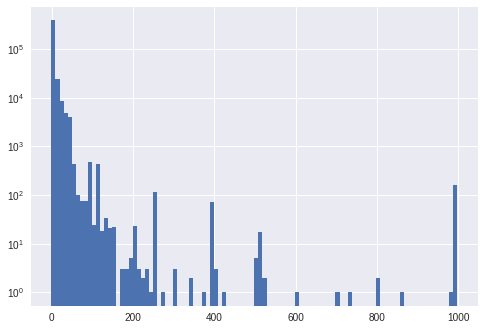

In [57]:
df['Rival Bid Count'].hist(bins=100, log = True)

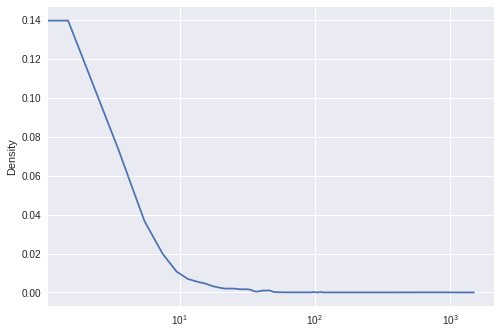

In [66]:
df['Rival Bid Count'].plot(kind='kde', logx= True)

In [11]:
len(set(df.index))

283

# Data Viz for DataFrame

In [34]:
forcauses = df[df['Termination Type'] == 'X']
len(forcauses)

1844

In [40]:
set(forcauses['Performance State'])

{nan,
 'AK',
 'AL',
 'AR',
 'AZ',
 'CA',
 'CO',
 'CT',
 'DC',
 'DE',
 'FL',
 'GA',
 'GU',
 'HI',
 'IA',
 'ID',
 'IL',
 'IN',
 'KS',
 'KY',
 'LA',
 'MA',
 'MD',
 'ME',
 'MI',
 'MN',
 'MO',
 'MS',
 'MT',
 'NC',
 'ND',
 'NE',
 'NJ',
 'NM',
 'NV',
 'NY',
 'OH',
 'OK',
 'OR',
 'PA',
 'PR',
 'RI',
 'SC',
 'SD',
 'TN',
 'TX',
 'UT',
 'VA',
 'VI',
 'VT',
 'WA',
 'WI',
 'WV',
 'WY'}

In [44]:
statecounts = forcauses[['Contract Pricing', 'Performance State']].groupby(['Performance State']).agg('count')

In [47]:
statecounts.head()

,Contract Pricing
Performance State,
AK,11
AL,11
AR,58
AZ,24
CA,106


In [51]:
statecounts.columns = ['value']

In [55]:
statecounts.to_json('statecounts.json', orient='index')

# Group By Resolution

In [70]:
cancellation_types

{'E': 'Terminate for Default (complete or partial)',
 'F': 'Terminate for Convenience (complete orpartial)',
 'K': 'Close Out',
 'N': 'Legal Contract Cancellation',
 'X': 'Terminate for Cause'}

In [73]:
outcomes = df[['Contract Pricing', 'Termination Type']].replace({"Termination Type": cancellation_types}).groupby(['Termination Type']).agg('count')
outcomes.sort_values(by = ['Contract Pricing'], ascending = False, inplace = True)
outcomes.columns = ['count']
# outcomes.replace({"Termination Type": cancellation_types})
# outcomes.Index = ['Close Out', 
#                   'Terminate for Convenience (complete or partial)', 
#                   'Legal Contract Cancellation', 
#                   'Terminate for Default (complete or partial)',
#                   'Terminate for Cause']

outcomes

,count
Termination Type,
Close Out,254452
Terminate for Convenience (complete orpartial),89827
Legal Contract Cancellation,65770
Terminate for Default (complete or partial),9821
Terminate for Cause,1843


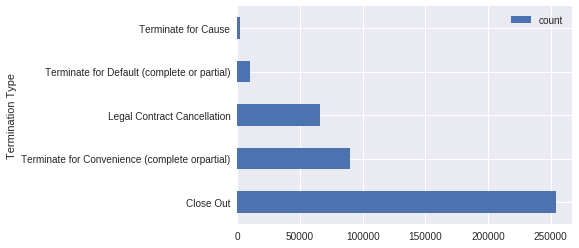

In [82]:
outcomes.plot(kind='barh')

# Machine Learning Predictions

In [69]:
from sklearn import base

class ColumnSelectTransformer(base.BaseEstimator, base.TransformerMixin):
    
    def __init__(self, col_names):
        self.col_names = col_names  # We will need these in transform()
    
    def fit(self, X, y=None):
        # This transformer doesn't need to learn anything about the data,
        # so it can just return self without any further processing
        return self
    
    def transform(self, X):
        # Return an array with the same number of rows as X and one
        # column for each in self.col_names
#         return[[row[col] for col in self.col_names] for row in X]
        return(X[self.col_names])

In [ ]:
from sklearn import base

class CategoryTransformer(base.BaseEstimator, base.TransformerMixin):
    
    def __init__(self):
        pass
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):

In [75]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MultiLabelBinarizer

targets = df['Termination Type']
trainer = df[#['Rival Bid Count',  
             # 'Extent Competed', 
              'Performance State']#]

# df[]

# trainer.fillna(-1, inplace = True)

pipe = Pipeline([
    ('colsel', ColumnSelectTransformer(['Performance State'])),
#     ('label', LabelEncoder()),
#     ('mlb', MultiLabelBinarizer()),
#     ('vectorize', OneHotEncoder()),
#     ('rf', RandomForestClassifier())
])



# df[]

pipe.fit(trainer, targets)

predictions = pipe.predict(trainer)

AttributeError: 'ColumnSelectTransformer' object has no attribute 'predict'

In [ ]:
correct = (predictions == targets)

In [106]:
print(correct[:100])
print(sum(correct) *1.0 /len(correct) * 1.0)

ContractID
0001              True
0001              True
0002              True
0070              True
0315              True
1J03              True
FA441910P0121     True
FA441911F0096     True
FA680016C0001     True
M2710016C3103     True
M6700410F0965     True
M6700412P1000     True
N0018913PZ166    False
N0025310P0447     True
N0060411P3300    False
N5572215F0013     True
N6883612P1973     True
W52P1J11P3015     True
W911QX13P0032     True
W911S612P0030     True
W911SA16P0085     True
W9124D09D0020    False
W9126G11P0165     True
W9127S17P0044     True
W9127S17P0126     True
W9128F12P0130     True
W912BV17P0053    False
W912DY11F0599     True
W912ES11P0181     True
W912LQ11P3006     True
                 ...  
0003              True
0010             False
0076              True
0181              True
0278              True
0306              True
FA441814P0119     True
FA462115P0045     True
FA462616P0100     True
HC104710F4125     True
HDEC0416C0025     True
N4034511D0017    False
